<a href="https://colab.research.google.com/github/Diego875621/Data_Science/blob/main/Health%20Insurance%20Cost%20Prediction/Previs%C3%A3o_dos_custos_dos_seguros_de_sa%C3%BAde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão dos custos dos seguros de saúde**

<p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Health%20Insurance%20Cost%20Prediction/ON40S50.jpg?raw=true" width="40%"></p>
<p align=center>Fonte: Freepik

Há uma grande variedades de empresas no ramo de seguro de saúde que podem ter abrangência básica ou avançada, com limitação geográfica ou nacional. E com isso, os preços de planos, sejam básicos ou mais completos, podem oscilar.

Estes valores variáveis dependem de vários fatores do cliente e também do ambiente, como: idade, renda anual, localização, se o plano é individual ou em grupo, estado de saúde atual, histórico de uso de alcool, cigarro ou entorpecentes, entre vários outros.

Escolher um plano de saúde não é uma tarefa fácil. Existe planos mais básicos e planos mais completos ou "premiums". E a sua decisão influenciará o seu custo mensal e o quanto você terá que pagar por fora quando precisar de assistência médica.

Nos EUA, mesmo com a instalação do *Affordable Care Act* ou “ACA” e o fornecimento de subsídios para famílias de baixa renda segundo o nível de pobreza federal, ainda há muitas pessoas que não têm condições de pagar por planos de saúde.

Segundo a Kaiser Family Foundation, um adulto de 21 anos tem custos mensais, em média, de 313 a 450 dólares por mês, a depender do nível do plano. E quanto maior a idade do indivíduo, maior será o valor a se pagar, por exemplo, um indivíduo de de 60 anos pode ter custos mensais de 850 até 1225 dólares.

O objeto da nossa análise será utilizar Data Science para prever o custo de um seguro de saúde com base nas características do paciente disponíveis nesse dataset, que pode ser encontrado no [Kaggle](https://www.kaggle.com/datasets/annetxu/health-insurance-cost-prediction). 

Para isso, será primeiro feita uma análise exploratória das features e visualização dos gráficos. Em seguida, será feita a construção de modelos de regressão, pois, estamos lidando com uma variável alvo com valores contínuos. 

Também será usado a biblioteca Pycaret, que é uma biblioteca de Auto-MachineLearning. Após a comparação entre modelos, será escolhido um com as melhores métricas, depois o tunning desse modelo irá melhorar o resultado das métricas com base em GridSearchCV e por fim, o modelo será finalizado e salvo para posteriores predições em dados novos.

In [ ]:
# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Dataframe
data = 'https://raw.githubusercontent.com/Diego875621/Data_Science/main/Health%20Insurance%20Cost%20Prediction/insurance.csv'
df = pd.read_csv(data)

# **Dicionário de variáveis**

- age: Idade do contratante primário
- sex: Sexo do contratante - feminino ou masculino
- bmi: Índice de massa corporal (IMC)
- children: Número de crianças incluídas no seguro de saúde
- smoker: Fumante ou não
- region: Região geográfica do beneficiado nos Estados Unidos (US)
- charges: Custos médicos pago pelo seguro de saúde

Com base neste dataset, vamos analisar o custo dos seguros de saúde com base nas características dos pacientes: idade do paciente, se o mesmo é fumante ou não, em qual região vive, seu índice de massa corporal e a quantidade de filhos do mesmo e como essas variáveis podem afetar o custo final do seguro.

# **Análise Exploratória**

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print('Tamanho do dataset:', df.shape)

print('\n')

print('Quantidade de valores ausentes:')
df.isnull().sum()

Tamanho do dataset: (1338, 7)


Quantidade de valores ausentes:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Dtype do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- O dataset possui  1338 entradas e 7 colunas ou features. Não tem valores ausentes. 


- Há features categóricas: `sex`, `smoker` e `region` que precisam ser transformadas em numéricas. One-hot encoder pode ser usado nas features `children` e `region`.


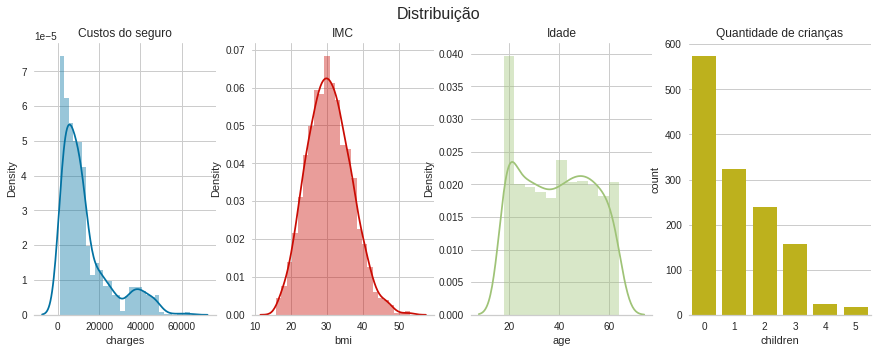

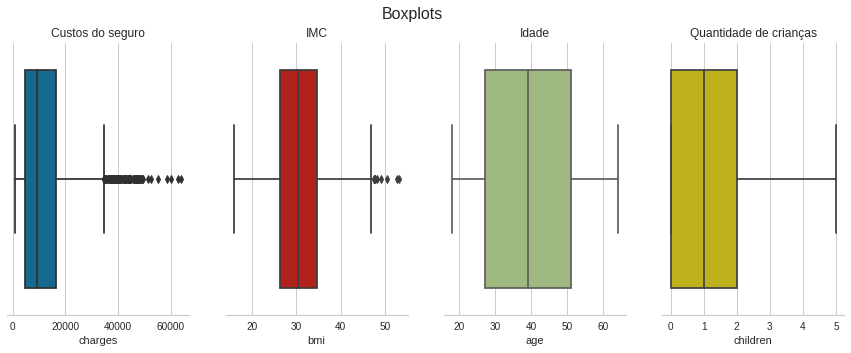

In [ ]:
# Histogramas

f, axs = plt.subplots(1, 4, figsize=(15,5))

f.suptitle('Distribuição', fontsize=16)

sns.axes_style("darkgrid")
sns.despine(left=True)

sns.distplot(df.charges, ax=axs[0])
axs[0].set_title('Custos do seguro')

sns.distplot(df.bmi, ax=axs[1], color='r')
axs[1].set_title('IMC')

sns.distplot(df.age, ax=axs[2], color='g')
axs[2].set_title('Idade')

sns.countplot(df.children, ax=axs[3], color='y')
axs[3].set_title('Quantidade de crianças')

plt.show();

print('\n\n')

# Boxplots

f, axs = plt.subplots(1, 4, figsize=(15,5))
f.suptitle('Boxplots', fontsize=16)

sns.axes_style("darkgrid")
sns.despine(left=True)

sns.boxplot(df.charges, ax=axs[0])
axs[0].set_title('Custos do seguro')

sns.boxplot(df.bmi, ax=axs[1], color='r')
axs[1].set_title('IMC')

sns.boxplot(df.age, ax=axs[2], color='g')
axs[2].set_title('Idade')

sns.boxplot(df.children, ax=axs[3], color='y')
axs[3].set_title('Quantidade de crianças')

plt.show();

In [ ]:
# Resumo estatístico do dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



- `charges` - é a nossa variável alvo (target) - Possui outliers e sua escala não está balanceada, possui alto desvio padrão, e a média é 13270 dólares.

- `bmi` - segue uma distribuição normalizada, e sua média tem valor 30,66. Possui outliers.

- `age` - tem média igual a 39 anos, a maioria tem idade entre 30-50 anos, sua distribuição é próxima do normal porém há assimetria e um platô observável.

- A maioria das pessoas não tem filhos (`children` = 0) e as quem tem, grande parte tem somente 1 filho.

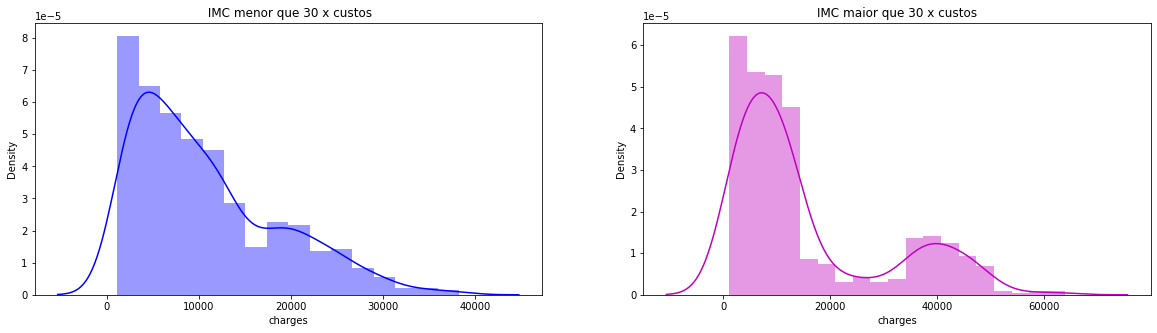

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [ ]:
# Distribuição - bmi x charges
f, axs = plt.subplots(1, 2, figsize=(20,5))

sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b', ax=axs[0]);
axs[0].set_title(' IMC menor que 30 x custos')

sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'm', ax=axs[1]);
axs[1].set_title('IMC maior que 30 x custos')

plt.show()

print('\n\n')

# O máximo valor de 'charges'
df[df['charges'] == df['charges'].max()]

- A média do índice de massa corporal (`bmi`) foi 30. E um valor igual ou maior do que 30 significa níveis de obesidade. Segundo os gráficos, pessoas em tais níveis gastaram mais com tratamentos. A pessoa que teve mais custos com saúde tem sexo feminino, da região sudeste IMC = 47,41 e é fumante.

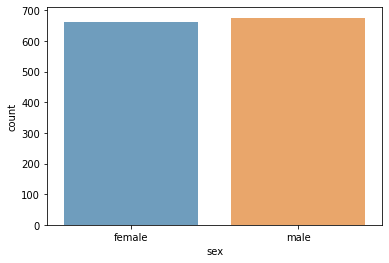

In [ ]:
# Distribuição - 'sex'
sns.countplot(df.sex, alpha = 0.7);

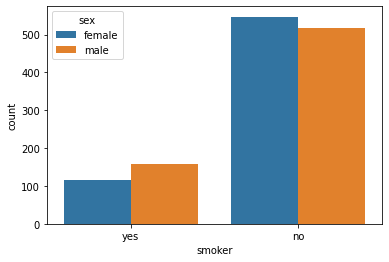

In [ ]:
# Distribuição - 'sex' x 'smoker'
sns.countplot(x = 'smoker', hue = 'sex', data = df);

A proporção do sexo de pessoas fumantes ou não fumantes se encontra razoalvelmente balanceada.

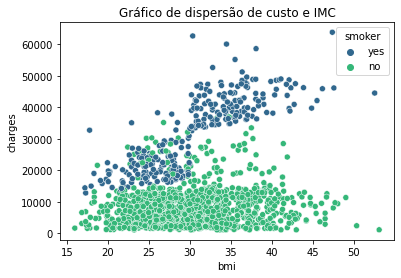

In [ ]:
# Gráfico de dispersão - 'bmi' x 'charges'
f, ax = plt.subplots()

ax = sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette = 'viridis')
ax.set_title('Gráfico de dispersão de custo e IMC')

plt.show();

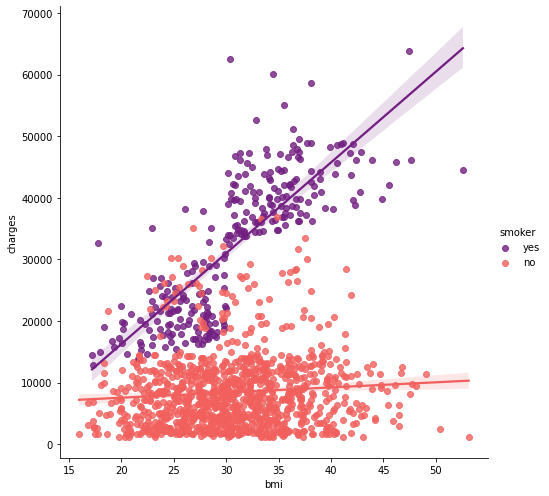

In [ ]:
# Gráfico de dispersão e regressão - 'bmi' x 'charges'
sns.lmplot(x='bmi', y='charges', hue='smoker', data=df, palette='magma', size=7);

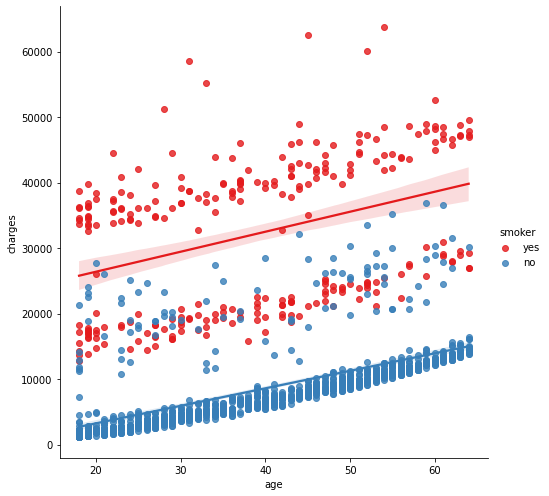

In [ ]:
# Gráfico de dispersão e regressão - 'age' x 'charges'
sns.lmplot(x='age', y='charges', hue='smoker', data=df, palette='Set1', size=7);

No caso de pessoas não-fumantes, o custo aumenta conforme a idade, o que faz sentido, pois a medida que envelhecemos tendemos a ser mais suscetíveis à doenças. Porém esse padrão não é tão significante em pessoas fumantes, nesse caso, esse grupo teve custos maiores independente da idade.

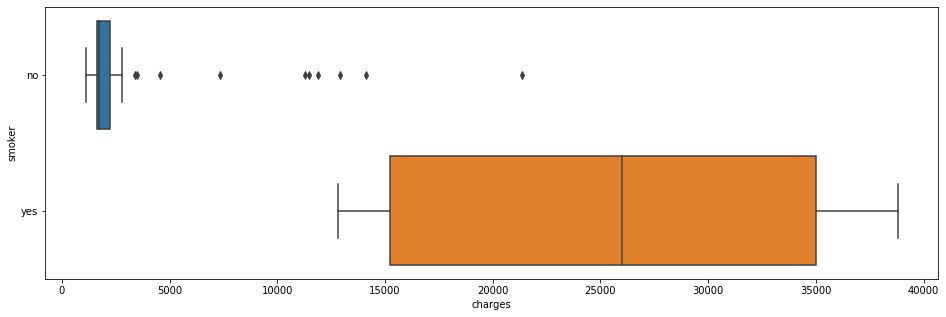

In [ ]:
# Boxplot smoker x charges
f, ax = plt.subplots(figsize=(16,5))
sns.boxplot(y = 'smoker', x = 'charges', data = df[(df.age == 18)], orient='h', ax=ax);


- Pessoas fumantes têm mais custos de seguro de saúde cobertos do que pessoas não fumantes, logo, tendem a ser pacientes mais caros para os planos de saúde e então, pagar maiores valores para os seguros de saúde.

- Mesmo pacientes de somente 18 anos e fumantes, têm gastos com saúde 
elevados do que outros jovens de 18 anos não fumante. 

- Podemos ver alguns outliers nos jovens não tabagistas, como hipótese, isso pode ser provável há acidentes ou doenças raras.

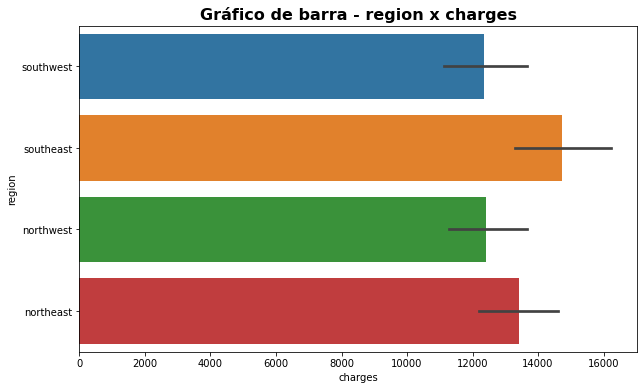

region
southeast    5.363690e+06
northeast    4.343669e+06
northwest    4.035712e+06
southwest    4.012755e+06
Name: charges, dtype: float64


In [ ]:
# Gráfico de barra - 'region' x 'charges'
f, ax = plt.subplots(figsize = (10,6))

ax.set_title('Gráfico de barra - region x charges', fontsize=16, fontweight='bold');

sns.barplot(y = 'region', x = 'charges', data = df, ax=ax)

plt.show()

charges_by_region = df['charges'].groupby(df.region).sum().sort_values(ascending = False)
print(charges_by_region)

- Regiões dos EUA que tem maiores gastos com saúde: Sudeste > Nordeste > Noroeste > Sudoeste

# **Preprocessing**

Aqui será feito primeiro a cópia do dataframe original e em seguida será feito o Feature Enginnering, que transformará as variáveis categóricas em númericas através do LabelEncoding e One-Hot-Encoding.

In [ ]:
# Cópia do dataframe original
df1 = df.copy()

In [ ]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df1.sex.drop_duplicates())
df1.sex = le.transform(df1.sex)

le.fit(df1.smoker.drop_duplicates())
df1.smoker = le.transform(df1.smoker)

# One-Hot-Encoding
df1 = pd.get_dummies(df1, columns=['region', 'children'], prefix_sep='_')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   smoker            1338 non-null   int64  
 4   charges           1338 non-null   float64
 5   region_northeast  1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
 9   children_0        1338 non-null   uint8  
 10  children_1        1338 non-null   uint8  
 11  children_2        1338 non-null   uint8  
 12  children_3        1338 non-null   uint8  
 13  children_4        1338 non-null   uint8  
 14  children_5        1338 non-null   uint8  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 65.5 KB


Agora todas as variáveis estão em dtypes numéricos e apropriados.

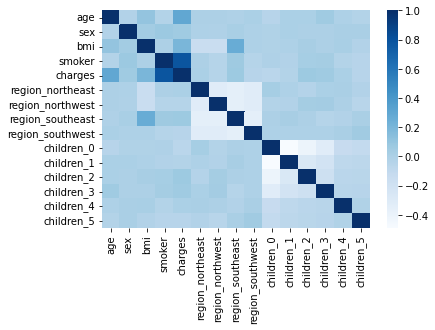

In [ ]:
# Mapa de correlação
corr = df1.corr()
sns.heatmap(corr, cmap = 'Blues')
plt.show();

Há alta correlação de `charges` com `smoker`. Assim como esperado, pessoas fumantes tendem a sofrer mais com problemas de saúde. 

Apesar de nesses dados haver baixa correlação de `charges` com `bmi`, também seria esperado um elevação, pois pessoas obesas normalmente têm IMC alto e também tendem a ter mais problemas de saúde.

# **Métricas**

Para avaliar a eficiência de um modelo regressor, nós podemos analisar algumas métricas.

**R2** - Coeficiente de determinação - Quanto mais próximo de 1, melhor, quanto mais próximo de 0, pior. 

(**MAE**) Erro médio absoluto - Quanto menor a taxa de erro melhor.

**Linearidade** - Avaliação a linearidade do modelo, por exemplo, a medida que as features aumentam de valor, a target deve aumentar proporcionamente também.
Não há evidência de curva linear dos valores predicados nesse modelo.

**Erro residual** - deve ter distribuição normalizada e sua média deve ser de valor 0 ou o mais proximo possível. 

Pouca ou nenhuma **Multicolinearidade** - esse fenômeno ocorre quando as features estão altamente correlacionada com cada uma. O fator VIF (Variance Inflation Factor) é útil nesse caso, valores acima de 5 indica níveis altos de multicolinearidade. 

# **Clustering**

A partir do aprendizado não supervisionado - Clustering - podemos agrupar e visualizar features com base na variável target. Abaixo será feito um clustering a partir de Kmeans de `bmi` em relação a `charges`. Para determinar o número de clusters (k) será utilizado a biblioteca KElbowVisualizer, que utiliza o "Elbow Method" que nos ajudará a visulizar qual é o melhor k.

O Elbow Method encontra a distância média da soma dos quadrados entre o centróide do cluster e as observações dos dados. À medida que o número de clusters aumenta, a soma média dos quadrados diminui. Basicamente, à medida que o número de clusters aumenta, a distância entre os pontos de dados e os centroides também diminui. A regra prática é sempre que vemos o ponto do "cotovelo" (intersecção das retas) devemos considerar este o número ideal de clusters.

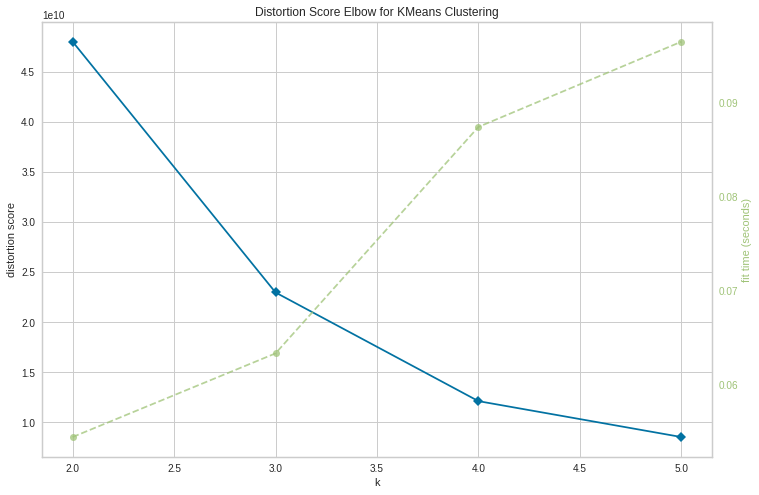

In [ ]:
# Determinação de número de clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig = plt.figure(figsize=(12,8))

C = df1[['charges','bmi']]

cluster = KMeans()
best_k = KElbowVisualizer(cluster, k=(2,6))

best_k.fit(C)
best_k.poof();

In [ ]:
# Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(C)

print('Centros do cluster')
print(kmeans.cluster_centers_, '\n')

print('Labels do cluster')
print(kmeans.labels_)

Centros do cluster
[[1.85057118e+04 2.91114984e+01]
 [6.29601781e+03 3.04320311e+01]
 [4.07613086e+04 3.48454321e+01]] 

Labels do cluster
[0 1 1 ... 1 1 0]


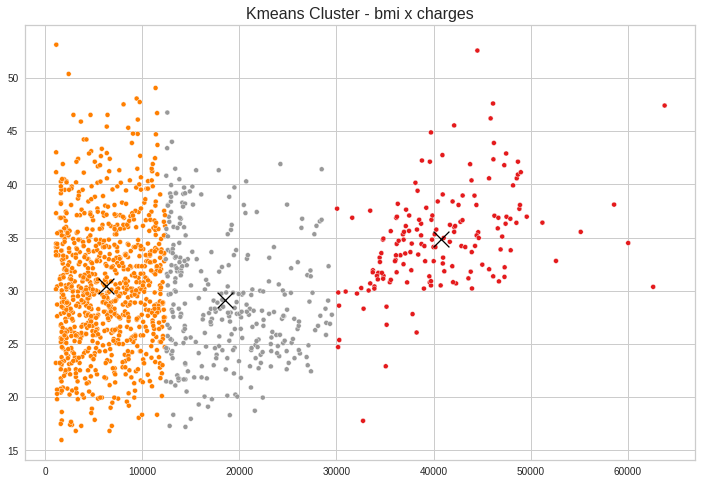

In [ ]:
# Visualização do Cluster
fig = plt.figure(figsize=(12,8))

sns.scatterplot(C.values[:,0], C.values[:,1], c = kmeans.labels_, cmap="Set1_r", s=25)
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Cluster - bmi x charges", fontsize=16)
plt.show()

- Podemos perceber que o grupo mais denso é o primeiro (amarelo) e com menores valores de `charges`, seguido do grupo cinza e por ultimo do grupo vermelho, mais disperso. É perceptível que o terceiro cluster e com maior gastos se concentra quase que exclusivamente em um IMC acima de 30.

- Importante notar que, nesse dataset, nem todas as pessoas que têm IMC acima de 30 tiveram gastos de alta magnitude. Por exemplo, há pessoas IMC > 30 em todos os 3 clusters. Logo, não necessiamente a correlação IMC x Custos implica causalidade nesse dataset.

# **Regressão**

Como estamos lidando com valores contínuos, a regressão será de maior utilidade. Diferentemente da classificação que tenta prever probabilidades, a regressão é uma técnica para prever valores e tem métricas como a MAE, R2 e outras. 

Os regressores utilizados nesse artigo serão o LinearRegression e o RandomForestRegressor e posteriormente a biblioteca PyCaret. 

## **LinearRegression**

In [ ]:
# Bibliotecas dos modelos
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Divisão treino x teste
X = df1.drop('charges', axis = 1)
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
# LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_pred = lin_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

print('Métricas - Linear Regression', '\n')

print(f'MAE: {mean_absolute_error(y_test, lin_pred):.3f}')

R2 = r2_score(y_test, lin_pred)
print(f'R2: {r2_score(y_test, lin_pred):.3f}')

#Variance Inflation Factor
VIF = 1/(1-R2)
print(f'VIF: {VIF:.3f}', '\n')

# Intercepto e coeficientes
print('Intercepto:', lin_reg.intercept_)
print('')
print('Coenficientes:', lin_reg.coef_)



Métricas - Linear Regression 

MAE: 4275.586
R2: 0.766
VIF: 4.280 

Intercepto: -11526.908093404054

Coenficientes: [  260.47155702    34.12925158   338.39997946 23650.96006245
   528.15608768   120.58705997  -281.58040024  -367.16274741
 -1147.90024227  -752.01591971   349.69902225  -559.82283113
  2406.22978996  -296.18981909]


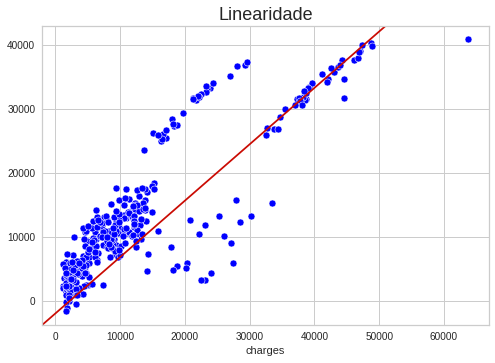

In [ ]:
# Plot Teste de linearidade

import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

f, ax = plt.subplots()
sns.scatterplot(y_test, lin_pred, ax=ax, color='blue')

line = mlines.Line2D([0, 1], [0, 1.3], color='r')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
ax.set_title('Linearidade', fontsize = 18);

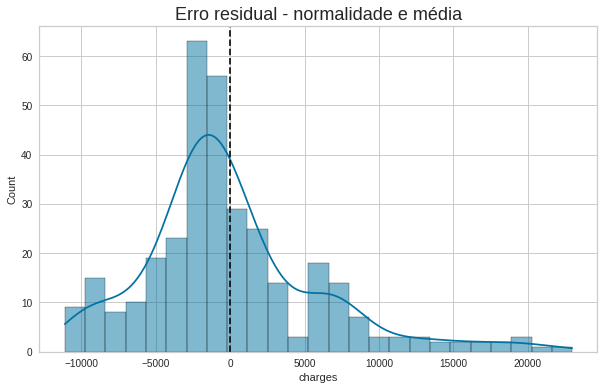

In [ ]:
# Plot Teste de linearidade
f, ax = plt.subplots(figsize=(10,6))

sns.histplot((y_test - lin_pred), kde = True)
ax.axvline((y_test - lin_pred).mean(), color ='k', linestyle='--')
ax.set_title('Erro residual - normalidade e média', fontsize = 18);

As métricas da Linear Regression obtidas foram:

- MAE: 4275.586
- R2: 0.766
- VIF: 4.280 

- Linearidade: Ausência de linearidade

- Erro residual: Média residual igual a zero e o gráfico do erro residual apresenta assimetria.

- Intercepto: -11526.908093404054

- Coenficientes: [  260.47155702    34.12925158   338.39997946 23650.96006245
   528.15608768   120.58705997  -281.58040024  -367.16274741
 -1147.90024227  -752.01591971   349.69902225  -559.82283113
  2406.22978996  -296.18981909]


## **RandomForestRegressor**

In [ ]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mae',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)


In [ ]:
print('Métricas - Random Forest Regressor', '\n')
MAE_randomforest = mean_absolute_error(y_test,forest_test_pred)
print(f'MAE: {MAE_randomforest:.3f}')

R2_randomforest = r2_score(y_test,forest_test_pred)
print(f'R2: {R2_randomforest:.3f}')

VIF_randomforest = 1/(1-R2_randomforest)
print(f'VIF: {VIF_randomforest:.3f}')

Métricas - Random Forest Regressor 

MAE: 2634.641
R2: 0.852
VIF: 6.778


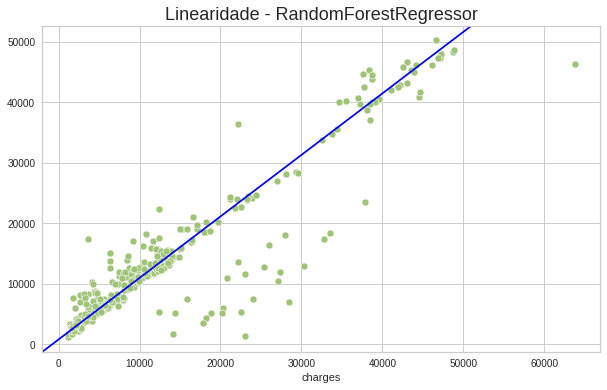

In [ ]:
# Linearidade - RandomForestRegressor
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

f, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(y_test, forest_test_pred, color='g')
ax.set_title('Linearidade - RandomForestRegressor', fontsize=18);

line = mlines.Line2D([0, 1], [0, 1.3], color='blue')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

plt.show()

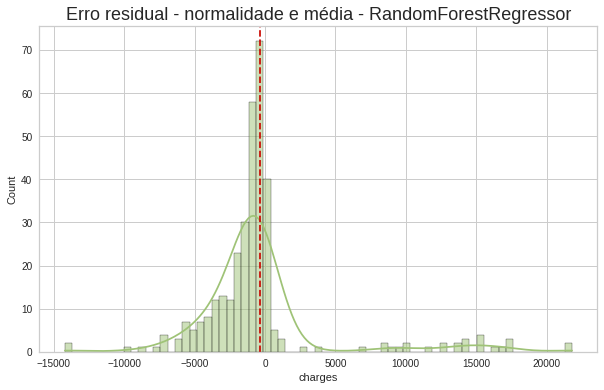

In [ ]:
# Erro residual - RandomForestRegressor
f, ax = plt.subplots(figsize=(10,6))

sns.histplot((y_test - forest_test_pred), kde = True, color = 'g')
ax.axvline((y_test - forest_test_pred).mean(), color = 'r', linestyle='--')
ax.set_title('Erro residual - normalidade e média - RandomForestRegressor', fontsize=18);


Métricas do Random Forest Regressor 

- MAE: 2634.641
- R2: 0.852
- VIF: 6.778


- Linearidade: Perceptível tendência linear 

- Erro residual: Média residual próximo a zero e o gráfico do erro residual apresenta assimetria.



# **Modelo Regressor - Pycaret**

A biblioteca Pycaret é baseado no Auto-Machine-Learning. Ou seja, a maior parte dos processos, como por exemplo, encoding e tunning, são automatizados. Primeiro o módulo será instalado, para então utilizar o setup no dataset, comparação entre os modelos e escolha do melhor modelo, tunning dos hiper-parâmetros do modelo, avaliação das métricas e finalização.

In [ ]:
# Instalação pycaret
!pip install pycaret -q

In [ ]:
# Desabilitar mensagens de log
import logging, sys
logging.disable(sys.maxsize)

# Habilitar o Colab mode
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
# Módulos de regressão
from pycaret.regression import *

In [ ]:
# Divisão treino x test
test = df.sample(frac = 0.25)
train = df.drop(test.index)

test.reset_index(inplace = True, drop = True)
train.reset_index(inplace = True, drop = True)

In [ ]:
# Setup
reg = setup(data = df, target = 'charges',
            remove_outliers = True, 
            log_experiment = True, experiment_name = 'Reg01')

,Description,Value
0,session_id,4044
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(889, 12)"


In [ ]:
# Comparação entre os modelos
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2255.4746,1.846281e+07,4242.3077,0.8610,0.4054,0.2687,0.164
rf,Random Forest Regressor,2348.0382,2.016571e+07,4451.9952,0.8470,0.4312,0.2880,0.791
lightgbm,Light Gradient Boosting Machine,2610.5306,2.064913e+07,4500.7144,0.8431,0.5130,0.3391,0.275
ada,AdaBoost Regressor,3636.8464,2.370332e+07,4834.3543,0.8207,0.6007,0.6548,0.049
et,Extra Trees Regressor,2428.1760,2.387017e+07,4850.0503,0.8181,0.4564,0.2846,0.723
llar,Lasso Least Angle Regression,3922.1719,3.375932e+07,5773.3345,0.7446,0.5065,0.3832,0.037
ridge,Ridge Regression,3940.7955,3.378828e+07,5776.6102,0.7444,0.5091,0.3861,0.028
lar,Least Angle Regression,3925.9141,3.378240e+07,5775.5829,0.7444,0.5134,0.3831,0.033
br,Bayesian Ridge,3935.0138,3.378677e+07,5776.2815,0.7444,0.5106,0.3849,0.031
lasso,Lasso Regression,3926.2217,3.378228e+07,5775.5575,0.7444,0.5126,0.3832,0.033


In [ ]:
# Melhor modelo
best

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4044, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Instanciando
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2006.1999,1.219463e+07,3492.0811,0.9095,0.3328,0.2533
1,2636.9513,2.528416e+07,5028.3354,0.8633,0.4446,0.2919
2,2441.1135,2.638503e+07,5136.6360,0.8090,0.4426,0.2671
3,2537.0959,2.361915e+07,4859.9533,0.7883,0.4280,0.2509
4,2340.9747,1.978421e+07,4447.9449,0.8737,0.3883,0.2415
5,1947.3953,1.419685e+07,3767.8703,0.8924,0.4310,0.2698
6,2204.1784,1.361375e+07,3689.6818,0.8730,0.4355,0.3013
7,2363.7595,2.031563e+07,4507.2860,0.8251,0.4376,0.2871
8,1900.0946,8.910589e+06,2985.0610,0.9178,0.3479,0.2972


In [ ]:
# Tunning
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2475.5909,1.403043e+07,3745.7218,0.8959,0.4001,0.3523
1,3495.8573,2.869277e+07,5356.5633,0.8449,0.4938,0.4052
2,2991.8574,2.903670e+07,5388.5710,0.7898,0.4460,0.3285
3,2938.7447,2.576512e+07,5075.9358,0.7690,0.4438,0.3073
4,2980.4152,2.204587e+07,4695.3026,0.8592,0.4342,0.3357
5,2733.7429,1.902758e+07,4362.0618,0.8557,0.4801,0.3690
6,2335.4907,1.373156e+07,3705.6118,0.8719,0.4176,0.3179
7,2970.0344,2.152221e+07,4639.2039,0.8147,0.4937,0.4305
8,2769.4531,1.614173e+07,4017.6771,0.8511,0.4218,0.4020


In [ ]:
# Comparação dos hiper-parâmetros antes e pós tunning
print(gbr)

print('\n\n')

print(' GBR após Tunning: \n', tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4044, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)



 GBR após Tunning: 
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.1, min_impurity_split=None,
     

In [ ]:
# Avaliação do modelo
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
final_gbr = finalize_model(tuned_gbr)

In [ ]:
predict_model(final_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2812.2147,2.191767e+07,4681.6308,0.8575,0.4327,0.3586


,age,bmi,sex_female,children_0,children_1,children_2,children_3,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,24.0,27.600000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18955.220703,5331.338572
1,23.0,24.510000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2396.095947,3846.154752
2,21.0,16.815001,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3167.455811,4419.820456
3,20.0,33.299999,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1880.487061,3385.837941
4,52.0,33.250000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9722.769531,12532.759864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,18.0,31.680000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,34303.167969,33573.619694
398,57.0,29.809999,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,27533.912109,32456.217300
399,46.0,39.424999,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8342.909180,11294.073971
400,18.0,36.849998,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1629.833496,2917.583120


In [ ]:
test_predict = predict_model(final_gbr, data = test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2542.227,1.763717e+07,4199.663,0.8934,0.4101,0.3028


In [ ]:
save_model(final_gbr, 'GBR_regressor_25_09_2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.05, loss='ls',
                                            max_depth=4, max_features='sqrt',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.1,
                        

Regressão no Pycaret:

- O melhor modelo foi o GradientBoostRegressor (GBR)
- Coeficiente de determinação (R2) = 0.893
- Erro médio absoluto ou Mean Absolute Error (MAE) = 2542.227

- De acordo com o GBR, as features mais importantes para o modelo foram `smoker`, `age` e `bmi`. Ou seja, por exemplo, um paciente fumante tem muito mais peso na hora custo do seguro de saúde.

- Linearidade: O método apresenta linearidade.

- Erro residual: média igual a 0 e assimetria.

# **Conclusões**

<p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Health%20Insurance%20Cost%20Prediction/concept-pharmaceutical-business-illegal-pharmaceutical-business.jpg?raw=true" width="40%"></p>
<p align=center>Fonte: Freepik

**Análise exploratória**: 

Os dados não apresentam valores ausentes e algumas features precisaram ser encodadas para valores numéricos. É evidente que pessoas fumantes têm mais gastos com saúde. A maioria dos pacientes têm IMC maior que 30, ou seja, são considerados obesos e tendem a gastar mais também, inclusive pacientes jovens. também demonstrado pelo clustering. A região sudeste apareceu como a região mais cara. A distribuição entre sexo masculino e feminino se encontra balanceada.

**Regressores**:

A regressão feita manualmente utilizou os regressores LinearRegression e RandomForestRegressor. Porém, o último teve menor valores de erro (MAE = 2634.641) e maior coeficiente de determinação (R2 = 0.893) e assim performou melhor. Já para a regressão automática, foi detectado que para este dataset o GradientBoostRegressor (GBR) desempenhou melhor e seu valor final obteve os melhores resultados em relação aos outros modelos (R2 = 0.898 e MAE = 2542.227) e também mostrou que as features mais importantes para o modelo foram `smoker`, `bmi` e `age`.


**Aplicações**

Através da regressão, podemos prever os valores de `charges` que é nossa variável alvo com base nos dados das outras variáveis. De forma certeira, podemos afirmar que se o paciente é fumante, os custos têm uma alta tendência de aumentar de valor. O melhor modelo para uso seria o GBR, pois demonstrou melhores métricas após o tunning de hiper-parâmetros.

Com base nesse trabalho, pode ser criado, juntamente com outras tecnologias da informação, por exemplo, calculadores de custos dos seguros de saúde. Dessa forma, criando softwares ou apps que facilitem a aplicação do modelo criado.

Deve-se reforçar que os custos dos seguros de saúde são altamente variáveis e vários fatores podem influenciar. Se as pessoas benefiadas:
 - são fumantes ou não, 
 - idade dos beneficiados
 - o tipo e o local de trabalho, 
 - a localização do beneficiado, 
 - a renda anual da família, 
 - leis federais/estaduais/municipais, 
 - a quantidade de filhos e, 
 - o tipo de abrangência dos planos. 
 
São alguns dos principais fatores a se levar em conta. Nesse dataset poderia ser ter mais informações como por exemplo, renda familiar, localização, se os beneficiados têm seguro pagos pelas empresas, se os beneficiados estão desempregados ou não e total número de membros beneficiados.

Desse modo, o deploy desse modelo de machine learning pode auxiliar na tomada de melhores decisões para cada caso.Pacientes por exemplo, poderiam prever e tentar se planejar financeiramente para a escolha do plano de saúde que melhor se encaixa para a sua família. E empresas de plano de seguro de saúde podem usar também tais predições para melhorar a qualidade da entrega de seus serviços e ter mais fontes mais respaldar suas precificações.


Fonte:

https://www.kff.org/report-section/ehbs-2020-section-6-worker-and-employer-contributions-for-premiums/

Imagens:

<a href="https://www.freepik.com/free-vector/businessman-with-pile-coins_1076114.htm#query=health%20costs&position=4&from_view=search&track=sph">Image by dooder</a> on Freepik


<a href="https://www.freepik.com/free-photo/concept-pharmaceutical-business-illegal-pharmaceutical-business_29733501.htm#query=health%20costs&position=6&from_view=search&track=sph">Image by atlascompany</a> on Freepik